<a href="https://colab.research.google.com/github/UzunDemir/Auto_ML_Part_2/blob/main/3_6_practic_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'house-prices-advanced-regression-techniques:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F5407%2F868283%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240617%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240617T121649Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D04977de4ffb67a51b8c3305fae0e61bee29894dac7f88f7a6f62a133fedca64d9fe3f3c38a9fc0a625b7994bee1fc641c11012170d557e2b35b30586112ed8afbafaa332bdd2fab02aaddde251b357ff95bedea30e5fc2f6a6c2e52ee15b9aac2d6c17222a0c7980451a254505a62b821c8aadb9cac2f877fbdf95f5c29e6ecffa26e20f031db740106f46d03c0b8c88d5fd8e00ca82ec0302c7e757f84924e3b151185545b13d86401f3c99b3557aa2de38e9c9a02b38745365b26350083e0c01de6a381b53d6fa766f8ab60aea7f6b3e7dbbb9df2e1ced10db4c8b9b59917d1afeeb358c57dd89939418538a48cef5abf16f0ba015944e57a1846cc9ef2218'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 203809 bytes downloaded
Downloaded and uncompressed: house-prices-advanced-regression-techniques
Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [6]:
import pandas as pd
import numpy as np

In [7]:
# Указываем путь к файлу
file_path = '/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt'

# Открываем файл для чтения
with open(file_path, 'r') as file:
    # Читаем содержимое файла
    data_description = file.read()

# Выводим содержимое файла
print(data_description)


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [8]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [9]:
d_ = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [10]:
data.shape

(1460, 81)

In [11]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
data['SalePrice'].value_counts(normalize=True)

140000    0.013699
135000    0.011644
155000    0.009589
145000    0.009589
190000    0.008904
            ...   
202665    0.000685
164900    0.000685
208300    0.000685
181500    0.000685
147500    0.000685
Name: SalePrice, Length: 663, dtype: float64

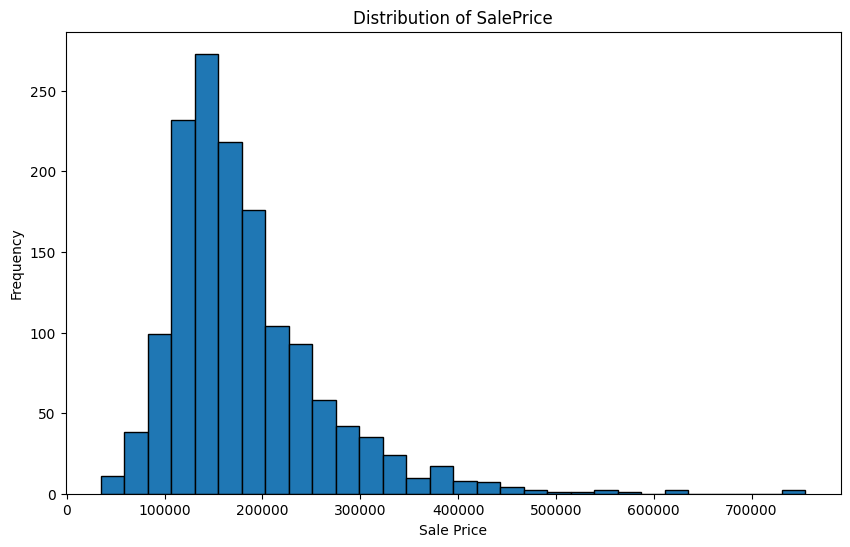

In [13]:
import matplotlib.pyplot as plt

# Построение гистограммы
plt.figure(figsize=(10, 6))
data['SalePrice'].plot(kind='hist', bins=30, edgecolor='black')

# Настройка заголовка и осей
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Отображение гистограммы
plt.show()


## Анализ датасета и заполнение пропусков

In [14]:
# Check if there are any missing values
data.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [15]:
missing_values = data.isna().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


На основе предоставленных данных о пропусках, можно так их обработать:

- **PoolQC**: Пропуски, вероятно, связаны с отсутствием бассейнов. Можно заполнить "None".
- **MiscFeature, Alley, Fence**: Также можно заполнить "None", предполагая, что соответствующие функции отсутствуют.
- **MasVnrType, FireplaceQu, GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual**: Можно заполнить наиболее часто встречающимся значением или "None", если это категориальные признаки.
- **LotFrontage**: Можно заполнить средним или медианой, основываясь на других характеристиках участка.
- **BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1**: Можно заполнить наиболее часто встречающимся значением или "None".
- **MasVnrArea, Electrical**: Можно заполнить средним, медианой или наиболее часто встречающимся значением.



In [16]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [17]:
# Заменяем пропуски в столбце PoolQC на значение "None"
data['PoolQC'].fillna('None', inplace=True)

# Проверяем, что пропуски успешно заполнены
print(data['PoolQC'].value_counts())

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


In [18]:
# Заполнение пропусков в столбцах MiscFeature, Alley и Fence значением "None"
data['MiscFeature'].fillna('None', inplace=True)
data['Alley'].fillna('None', inplace=True)
data['Fence'].fillna('None', inplace=True)

# Проверяем, что пропуски успешно заполнены
print("Пропуски в столбце MiscFeature:")
print(data['MiscFeature'].value_counts())
print("\nПропуски в столбце Alley:")
print(data['Alley'].value_counts())
print("\nПропуски в столбце Fence:")
print(data['Fence'].value_counts())


Пропуски в столбце MiscFeature:
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

Пропуски в столбце Alley:
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

Пропуски в столбце Fence:
None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


In [19]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

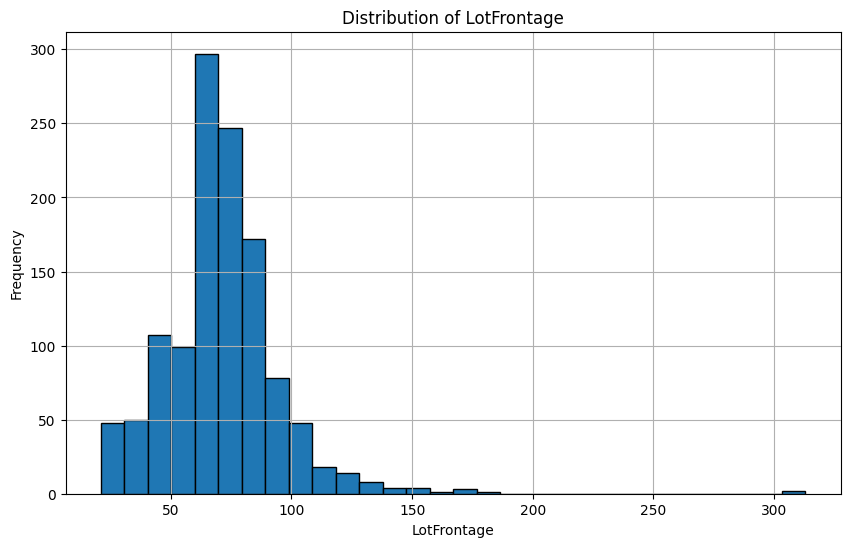

In [20]:
# Визуализация распределения значений в столбце LotFrontage
plt.figure(figsize=(10, 6))
data['LotFrontage'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
# Вычисление медианы столбца LotFrontage
median_value = data['LotFrontage'].median()

# Заполнение пропусков медианой
data['LotFrontage'].fillna(median_value, inplace=True)

# Проверяем, что пропуски успешно заполнены
print("Медианное значение LotFrontage:", median_value)

Медианное значение LotFrontage: 69.0


In [22]:
# Проверяем, что пропуски успешно заполнены
print(data['LotFrontage'].value_counts())

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


In [23]:
# Проверяем, что пропуски успешно заполнены
print(data['MasVnrType'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [24]:
# Заменяем пропуски в столбце
data['MasVnrType'].fillna('None', inplace=True)

# Проверяем, что пропуски успешно заполнены
print(data['MasVnrType'].value_counts())

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [25]:
# Проверяем, что пропуски успешно заполнены
print(data['FireplaceQu'].value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [26]:
# Заменяем пропуски в столбце
data['FireplaceQu'].fillna('None', inplace=True)

# Проверяем, что пропуски успешно заполнены
print(data['FireplaceQu'].value_counts())

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64


In [27]:
# Проверяем, что пропуски успешно заполнены
print(data['GarageYrBlt'].value_counts())

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


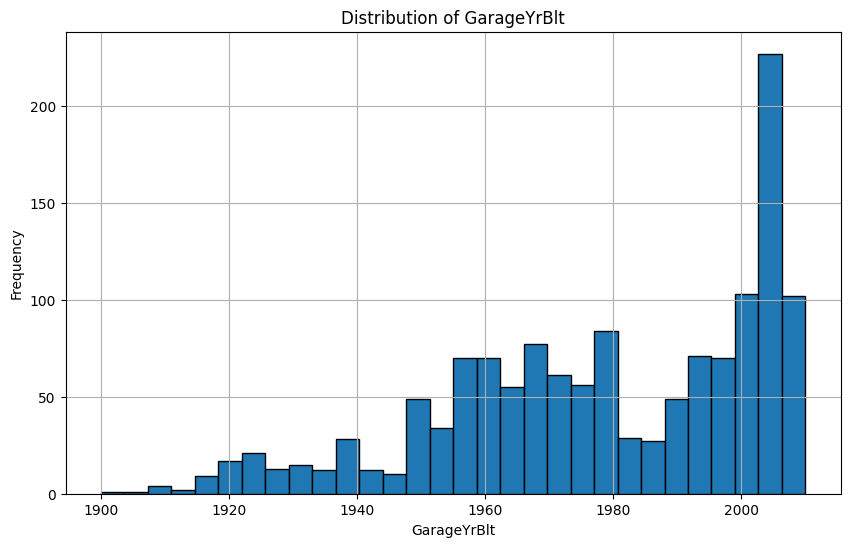

In [28]:
# Визуализация распределения значений в столбце GarageYrBlt
plt.figure(figsize=(10, 6))
data['GarageYrBlt'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of GarageYrBlt')
plt.xlabel('GarageYrBlt')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
# Вычисление моды столбца GarageYrBlt
mode_value = d_['GarageYrBlt'].mode()[0]  # Используем [0], чтобы получить самое частое значение как объект, а не как одноэлементный массив

# Заполнение пропусков модой
data['GarageYrBlt'].fillna(mode_value, inplace=True)

# Проверяем, что пропуски успешно заполнены
print("Самое частое значение GarageYrBlt:", mode_value)

Самое частое значение GarageYrBlt: 2005.0


остались для заполнения пропусков GarageCond, GarageType, GarageFinish, GarageQual

In [30]:
# Проверяем, что пропуски успешно заполнены
print(data['GarageCond'].value_counts())

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


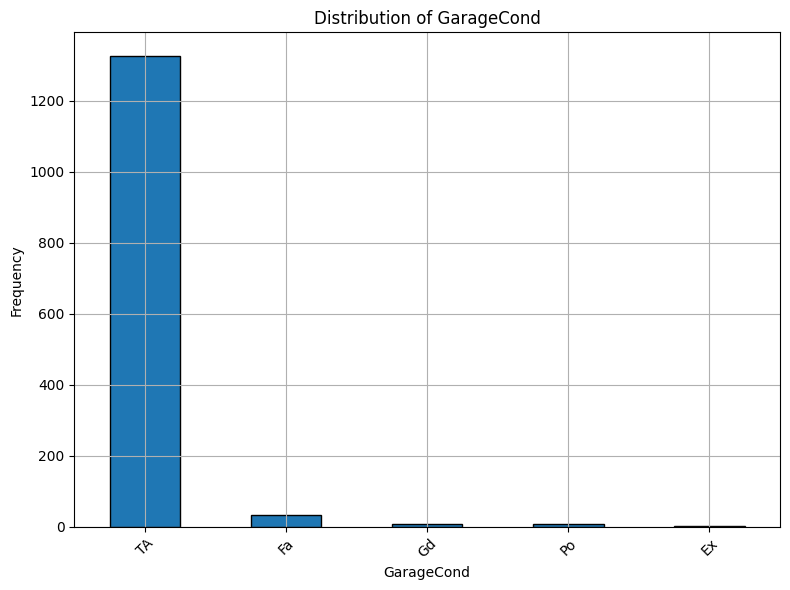

In [31]:
# Визуализация распределения значений в столбце GarageCond
plt.figure(figsize=(8, 6))
data['GarageCond'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of GarageCond')
plt.xlabel('GarageCond')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Поворот подписей по оси X для лучшей читаемости
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Заполнение пропусков в столбце GarageCond значением "NA"
data['GarageCond'].fillna('NA', inplace=True)

# Проверяем, что пропуски успешно заполнены
print("Значения столбца GarageCond после заполнения:")
print(data['GarageCond'].value_counts())

Значения столбца GarageCond после заполнения:
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


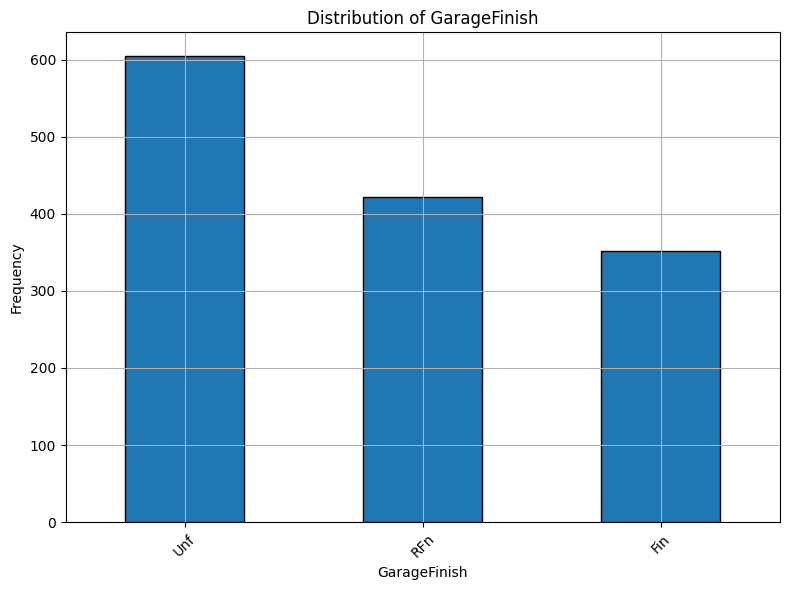

In [33]:
# Визуализация распределения значений в столбце GarageFinish
plt.figure(figsize=(8, 6))
data['GarageFinish'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of GarageFinish')
plt.xlabel('GarageFinish')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Поворот подписей по оси X для лучшей читаемости
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Заполнение пропусков в столбце GarageFinish значением "NA"
data['GarageFinish'].fillna('NA', inplace=True)

# Проверяем, что пропуски успешно заполнены
print("Значения столбца GarageFinish после заполнения:")
print(data['GarageFinish'].value_counts())

Значения столбца GarageFinish после заполнения:
Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64


In [35]:
# Заполнение пропусков в столбце GarageFinish значением "NA"
data['GarageQual'].fillna('NA', inplace=True)

# Проверяем, что пропуски успешно заполнены
print("Значения столбца GarageQual после заполнения:")
print(data['GarageQual'].value_counts())

Значения столбца GarageQual после заполнения:
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [36]:
# Столбец BsmtFinType2
print("BsmtFinType2:")
print(data['BsmtFinType2'].value_counts())

# Столбец BsmtExposure
print("\nBsmtExposure:")
print(data['BsmtExposure'].value_counts())

# Столбец BsmtQual
print("\nBsmtQual:")
print(data['BsmtQual'].value_counts())

# Столбец BsmtCond
print("\nBsmtCond:")
print(data['BsmtCond'].value_counts())

# Столбец BsmtFinType1
print("\nBsmtFinType1:")
print(data['BsmtFinType1'].value_counts())


BsmtFinType2:
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

BsmtExposure:
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

BsmtQual:
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

BsmtCond:
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

BsmtFinType1:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [37]:
# Заполнение пропусков в каждом из столбцов значением "NA"
data['BsmtFinType2'].fillna('NA', inplace=True)
data['BsmtExposure'].fillna('NA', inplace=True)
data['BsmtQual'].fillna('NA', inplace=True)
data['BsmtCond'].fillna('NA', inplace=True)
data['BsmtFinType1'].fillna('NA', inplace=True)

# Проверка заполнения пропусков
print("Значения столбца BsmtFinType2 после заполнения пропусков:")
print(data['BsmtFinType2'].value_counts())

print("\nЗначения столбца BsmtExposure после заполнения пропусков:")
print(data['BsmtExposure'].value_counts())

print("\nЗначения столбца BsmtQual после заполнения пропусков:")
print(data['BsmtQual'].value_counts())

print("\nЗначения столбца BsmtCond после заполнения пропусков:")
print(data['BsmtCond'].value_counts())

print("\nЗначения столбца BsmtFinType1 после заполнения пропусков:")
print(data['BsmtFinType1'].value_counts())


Значения столбца BsmtFinType2 после заполнения пропусков:
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Значения столбца BsmtExposure после заполнения пропусков:
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64

Значения столбца BsmtQual после заполнения пропусков:
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

Значения столбца BsmtCond после заполнения пропусков:
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

Значения столбца BsmtFinType1 после заполнения пропусков:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64


In [38]:
# Замена значений "NA" на "No" в столбце BsmtExposure
data['BsmtExposure'].replace("NA", "No", inplace=True)

# Проверка изменений
print("Значения столбца BsmtExposure после замены 'NA' на 'No':")
print(data['BsmtExposure'].value_counts())


Значения столбца BsmtExposure после замены 'NA' на 'No':
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


MasVnrArea, Electrical

In [39]:


print(data['MasVnrArea'].value_counts())



print(data['Electrical'].value_counts())

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [40]:
# Заполнение пропусков в столбце MasVnrArea самым частым значением
mas_vnr_area_mode = data['MasVnrArea'].mode()[0]
data['MasVnrArea'].fillna(mas_vnr_area_mode, inplace=True)

# Заполнение пропусков в столбце Electrical самым частым значением
electrical_mode = data['Electrical'].mode()[0]
data['Electrical'].fillna(electrical_mode, inplace=True)

# Проверка изменений
print("Значения столбца MasVnrArea после заполнения пропусков самым частым значением:")
print(data['MasVnrArea'].value_counts())

print("\nЗначения столбца Electrical после заполнения пропусков самым частым значением:")
print(data['Electrical'].value_counts())


Значения столбца MasVnrArea после заполнения пропусков самым частым значением:
0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

Значения столбца Electrical после заполнения пропусков самым частым значением:
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [41]:
missing_values = data.isna().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


GarageType    81
dtype: int64


In [42]:
print(data['GarageType'].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [43]:
# Заполнение пропусков в столбце GarageType значением "NA"
data['GarageType'].fillna('NA', inplace=True)

# Проверка изменений
print("Значения столбца GarageType после заполнения пропусков:")
print(data['GarageType'].value_counts())


Значения столбца GarageType после заполнения пропусков:
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [44]:
missing_values = data.isna().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### Все пропуски заполнены

YearBuilt

YearRemodAdd

In [45]:
data.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

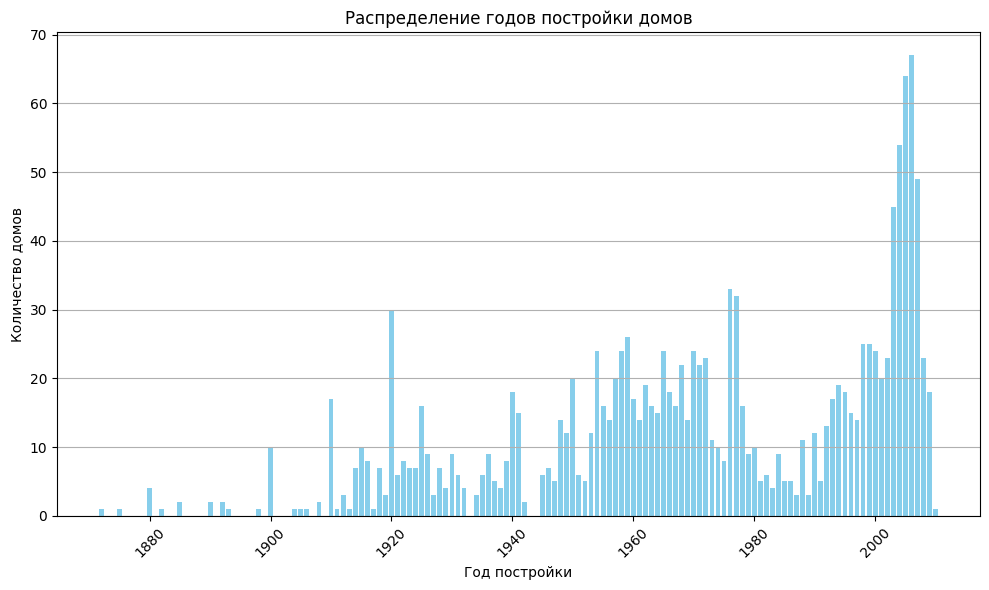

In [46]:
# Предполагая, что data.YearBuilt содержит данные о годе постройки домов
year_counts = data.YearBuilt.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.title('Распределение годов постройки домов')
plt.xticks(rotation=45)
plt.grid(True, axis='y')  # добавляем сетку только по оси y
plt.tight_layout()
plt.show()

## Использование ydata_profiling

In [47]:
try:
    import ydata_profiling
except ImportError:
    !pip install ydata-profiling

## Базовый исследовательский анализ данных — EDA

In [48]:
df = data.copy()

In [49]:
# не пошел в kaggle
from ydata_profiling import ProfileReport
# Генерация профильного отчета
profile = ProfileReport(
        df, title="Profile Report of the UCI Bank Marketing Dataset", explorative=True
    )

In [50]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:

profile.to_file("profile_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.7 MB/s eta 0:00:00


In [55]:
import sweetviz as sv

report = sv.analyze(df)

# Генерация отчета и сохранение в файл HTML
report.show_html("sweetviz_report.html")



                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [51]:
from IPython.display import IFrame

# Путь к вашему HTML файлу Sweetviz
html_path = "sweetviz_report.html"

# Отображение HTML файла внутри ячейки Colab
IFrame(html_path, width='100%', height='600px')


In [52]:
target = 'SalePrice'
rs = 42

In [53]:
from sklearn.model_selection import train_test_split
tr_data, te_data = train_test_split(df,
                                     test_size=0.2,
                                    #stratify=train_data[target],
                                     random_state=rs)
tr_data.shape, te_data.shape

((1168, 81), (292, 81))

In [54]:
!pip install -U lightautoml

In [55]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task

## Создание пресета для табличных данных

In [56]:
roles = {
    'target': target
}

task = Task('reg')

In [65]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Определяем целевую переменную
target = 'SalePrice'

# Формируем новые фичи
df['OverallQual_Cond'] = df['OverallQual'] * df['OverallCond']

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Определение задачи и параметров AutoML
task = Task('reg', metric='mae')  # Задача регрессии, используем MAE в качестве метрики

# Определение ролей признаков
roles = {
    'target': target,
    'drop': ['Id']  # Исключаем колонку Id из обучения
}

# Подготовка данных для AutoML
automl_data = TabularAutoML(task=task, timeout=3600, cpu_limit=4, general_params={'use_algos': [['lgb', 'lgb_tuned']]})

# Обучение модели и оценка результатов
oof_pred = automl_data.fit_predict(train_df, roles=roles)



INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (1168, 82)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3590.87 secs
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l1: 29892.1
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l1: 20537.6
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l1: 17423.1
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l1: 16356
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l1: 15880.2
D

In [69]:
# Вычисление MAE на обучающей выборке
mae_train = mean_absolute_error(train_df[target], oof_pred.data[:, 0])  # Используем data[:, 0], чтобы получить массив предсказанных значений

print(f"MAE на обучающей выборке: {mae_train}")

MAE на обучающей выборке: 15444.897093054366


In [73]:
# Предсказание на тестовой выборке
X_test = test_df.copy()
y_pred = automl_data.predict(X_test)
mae_test = mean_absolute_error(test_df[target], y_pred.data[:, 0])  # Используем data[:, 0], чтобы получить массив предсказанных значений

print(f"MAE на обучающей выборке: {mae_train}")
print(f"MAE на тестовой выборке: {mae_test}")

MAE на обучающей выборке: 15444.897093054366
MAE на тестовой выборке: 15443.339322024829


## Использование TabularUtilizedAutoML для точной настройки

Если нужно добиться лучших результатов, можно использовать TabularUtilizedAutoML, который позволяет более гибко настраивать процесс обучения, например, с использованием различных предварительно настроенных алгоритмов или особенностей данных. Также можно проводить более тщательную настройку параметров моделей и обработку данных перед обучением.

In [75]:
from lightautoml.automl.presets.tabular_presets import TabularUtilizedAutoML

# Использование TabularUtilizedAutoML для более гибкой настройки
automl_utilized = TabularUtilizedAutoML(task=task, timeout=360, cpu_limit=4, general_params={'use_algos': [['lgb', 'lgb_tuned']]})

oof_pred_utilized = automl_utilized.fit_predict(train_df, roles=roles)



INFO:lightautoml.addons.utilization.utilization:Start automl utilizator with listed constraints:
INFO:lightautoml.addons.utilization.utilization:- time: 360.00 seconds
INFO:lightautoml.addons.utilization.utilization:- CPU: 4 cores
INFO:lightautoml.addons.utilization.utilization:- memory: 16 GB

INFO:lightautoml.addons.utilization.utilization:If one preset completes earlier, next preset configuration will be started

INFO:lightautoml.addons.utilization.utilization:==================================================
INFO:lightautoml.addons.utilization.utilization:Start 0 automl preset configuration:
INFO:lightautoml.addons.utilization.utilization:conf_0_sel_type_0.yml, random state: {'reader_params': {'random_state': 42}, 'nn_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}
INFO3:lightautoml.addons.utilization.utilization:Found general_params in kwargs, need to combine
INFO3:lightautoml.addons.utilization.utilization:Merged variant for general_params = {

In [78]:
# Вычисление MAE на тестовой выборке
mae_utilized = mean_absolute_error(test_df[target].values, automl_utilized.predict(test_df.drop(columns=[target])).data)

print(f"Улучшенный MAE на тестовой выборке: {mae_utilized}")

Улучшенный MAE на тестовой выборке: 15559.678563784246


In [83]:
# Подготовка данных для AutoML с использованием TabularUtilizedAutoML
automl_utilized = TabularUtilizedAutoML(task=task, timeout=3600, cpu_limit=4,
                                        general_params={'use_algos': [['lgb', 'lgb_tuned'], ['cb', 'cb_tuned'], ['xgb', 'xgb_tuned']]},
                                        selection_params={'mode': 0, 'n_chains': 5, 'n_models': 10})

# Обучение модели и предсказание на обучающей выборке
oof_pred_utilized = automl_utilized.fit_predict(train_df, roles=roles)

Выходные данные были обрезаны до нескольких последних строк (5000).
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l1: 16815.8
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l1: 16695.3
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l1: 16600.2
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l1: 16476.8
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l1: 16444.5
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l1: 16450.2
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l1: 16435.9
DEBUG:lightautoml.ml_algo.boost_lgbm:[1400]	valid's l1: 16446.6
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[1259]	valid's l1: 16407.7
INFO:optuna.study.study:Trial 40 finished with value: -16407.716145833332 and parameters: {'feature_fraction': 0.7095606352419898, 'num_leaves': 228, 'bagging_fraction': 0.7551293842560746, 'min_sum_hessian_in_leaf': 0.01198316134356362, 'reg_alpha': 4.755315624102324e-06, 'reg_lambda': 1.6510994012469558}. Best is trial 3

In [84]:
# Вычисление MAE на тестовой выборке
mae_utilized = mean_absolute_error(test_df[target].values, automl_utilized.predict(test_df.drop(columns=[target])).data)

print(f"Улучшенный MAE на тестовой выборке: {mae_utilized}")

Улучшенный MAE на тестовой выборке: 15497.495077054795


In [86]:
# получение важности фич с помощью feature selector, обученного на этапе обучения алгоритма
automl.get_feature_scores('fast')

,Feature,Importance
0,OverallQual,1.206823e+14
1,GrLivArea,3.188382e+13
2,GarageCars,1.366517e+13
3,1stFlrSF,9.129726e+12
4,BsmtFinSF1,8.702543e+12
...,...,...
62,BldgType,2.855692e+09
63,ExterCond,1.998729e+09
64,Fence,1.835413e+09
65,BsmtFinType2,1.671701e+09


from matplotlib import pyplot as plt
_df_2['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [87]:
# получение важности фич с помощью permutation score
# (использует расчёт важности фич с расчётом метрик на тестовой выборке)
automl.get_feature_scores('accurate', te_data)

,Feature,Importance
0,GrLivArea,7.412946e+08
1,OverallQual,6.344006e+08
2,Neighborhood,3.765044e+08
3,1stFlrSF,1.581268e+08
4,BsmtFinSF1,1.339612e+08
...,...,...
62,MasVnrType,-6.392477e+06
63,Id,-7.045575e+06
64,RoofStyle,-9.489389e+06
65,MasVnrArea,-1.009108e+07


from matplotlib import pyplot as plt
_df_0['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

## Создание пресета для табличных данных с отчётом качества

In [92]:
from lightautoml.report.report_deco import ReportDeco

In [113]:
automl = TabularAutoML(task = task,
                       timeout = timeout,
                       cpu_limit = threads,
                       reader_params = {'n_jobs': threads, 'random_state': rs, 'cv': cv})

In [94]:
RD = ReportDeco(output_path = 'tabularAutoML_model_report')

automl_rd = RD(
    automl
)

oof_pred = automl_rd.fit_predict(tr_data, roles = roles, verbose = 1)

[15:32:33] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[15:32:33] Task: reg



INFO:lightautoml.automl.presets.base:Task: reg



[15:32:33] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[15:32:33] - time: 3600.00 seconds


INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds


[15:32:33] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[15:32:33] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[15:32:33] Train data shape: (1168, 81)



INFO:lightautoml.reader.base:Train data shape: (1168, 81)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[15:32:50] Layer 1 train process start. Time left 3582.21 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3582.21 secs


[15:32:51] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], 'embed_sizes': array([11,  5,  5,  4,  2,  4,  8,  7,  8,  5,  3, 13,  5,  3, 15,  2,  8,
        5,  5, 25,  5,  9,  5,  8,  2,  8,  6,  5,  6], dtype=int32), 'data_size': 102}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -45873.14336271367
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -29670.588307959402
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C =

[15:33:04] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -18299.702168503853


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -18299.702168503853


[15:33:04] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[15:33:04] Time left 3568.64 secs



INFO:lightautoml.automl.base:Time left 3568.64 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l1: 30170.3
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l1: 20532.5
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l1: 17338.2
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l1: 16278.5
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l1: 15806.1
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l1: 15685.3
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l1: 15736.7
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l1: 15878.4
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[635]	valid's l1: 15680.8


[15:33:06] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[15:33:06] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l1: 29694.2
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l1: 20271.6
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l1: 17632.1
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l1: 16625.4
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l1

[15:33:21] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -16122.771317155393


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -16122.771317155393


[15:33:21] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[15:33:21] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-42d708bb-f2e1-4c5c-9f72-dbe42072b8ca
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l1: 29014.3
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l1: 19680.2
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l1: 17418.8
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l1: 16574.7
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l1: 16344.5
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l1: 16310.2
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l1: 16361.1
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l1: 16437
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[608]	valid's l1: 16306.1
INFO:optuna.study.study:Trial 0 finished

[15:37:31] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.5893239616640573, 'num_leaves': 34, 'bagging_fraction': 0.6324227726883154, 'min_sum_hessian_in_leaf': 0.00939988411433561, 'reg_alpha': 1.9072008443601752e-08, 'reg_lambda': 9.15561509333849}
 achieve -15532.6405 mae


[15:37:31] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 34, 'feature_fraction': 0.5893239616640573, 'bagging_fraction': 0.6324227726883154, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1.9072008443601752e-08, 'reg_lambda': 9.15561509333849, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.00939988411433561}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l1: 16692.4
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l1: 16001
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l1: 15

[15:37:35] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -15628.083556292808


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -15628.083556292808


[15:37:35] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[15:37:35] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 2000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 300, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 53738.7098381	test: 57804.7790360	best: 57804.7790360 (0)	total: 4.06ms	remaining: 8.12s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 13625.7356881	test: 16744.3169592	best: 16744.3169592 (100)	total: 277ms	remaining: 5.21s
DEBUG:lightautoml.m

[15:37:48] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -15289.69707833904


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -15289.69707833904


[15:37:48] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[15:37:48] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-de818bf8-1442-4179-9f99-903af3058dfb
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 53766.8380829	test: 57857.4789408	best: 57857.4789408 (0)	total: 1.23ms	remaining: 2.46s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 14900.0878779	test: 17881.0767598	best: 17881.0767598 (100)	total: 113ms	remaining: 2.12s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 11887.0612854	test: 16084.7499847	best: 16080.0633300 (199)	total: 224ms	remaining: 2s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 9880.6308507	test: 15445.9304369	best: 15445.9304369 (300)	total: 329ms	remaining: 1.86s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 8560.4004579	test: 15224.6796978	best: 15220.4030827 (399)	total: 470ms	remaining: 1.87s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 7416.1250667	te

[15:41:43] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 5, 'nan_mode': 'Max', 'l2_leaf_reg': 0.010039333407569722, 'min_data_in_leaf': 3}
 achieve -14141.9626 mae


[15:41:43] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.010039333407569722, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 3, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Max', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 54382.7624406	test: 58506.2481916	best: 58506.2481916 (0)	total: 7.64ms	remaining: 22.9s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 16479.5944690	test: 19368.9962172	best: 19368.9962172 (100)	total: 325ms	remainin

[15:41:56] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -15246.519086445847


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -15246.519086445847


[15:41:56] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[15:41:56] Time left 3036.18 secs



INFO:lightautoml.automl.base:Time left 3036.18 secs



[15:41:56] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[15:41:56] Blending: optimization starts with equal weights and score -14893.657989083904


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -14893.657989083904


[15:41:56] Blending: iteration 0: score = -14859.276343776755, weights = [0.18758586 0.07520898 0.307267   0.23606798 0.19387025]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -14859.276343776755, weights = [0.18758586 0.07520898 0.307267   0.23606798 0.19387025]


[15:41:56] Blending: iteration 1: score = -14853.73933807791, weights = [0.1820719 0.        0.3283686 0.2667258 0.2228337]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -14853.73933807791, weights = [0.1820719 0.        0.3283686 0.2667258 0.2228337]


[15:41:57] Blending: iteration 2: score = -14853.648882304153, weights = [0.18103991 0.         0.3344135  0.265214   0.21933265]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -14853.648882304153, weights = [0.18103991 0.         0.3344135  0.265214   0.21933265]


[15:41:57] Blending: iteration 3: score = -14853.634815790881, weights = [0.18064226 0.         0.33638757 0.26463145 0.21833871]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = -14853.634815790881, weights = [0.18064226 0.         0.33638757 0.26463145 0.21833871]


[15:41:57] Blending: iteration 4: score = -14853.633591743364, weights = [0.18069337 0.         0.33638498 0.2646294  0.21829224]


INFO:lightautoml.automl.blend:Blending: iteration 4: score = -14853.633591743364, weights = [0.18069337 0.         0.33638498 0.2646294  0.21829224]


[15:41:57] Automl preset training completed in 564.03 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 564.03 seconds



[15:41:57] Model description:
Final prediction for new objects (level 0) = 
	 0.18069 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.33638 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.26463 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.21829 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.18069 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.33638 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.26463 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.21829 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 

/usr/local/lib/python3.10/dist-packages/lightautoml/report/report_deco.py:322: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["y_pred"] - data["y_true"], shade=True, color="m", ax=ax)


In [95]:
!ls tabularAutoML_model_report

feature_importance.png	      valid_error_hist.png    valid_target_distribution.png
lama_interactive_report.html  valid_scatter_plot.png


<Axes: xlabel='Feature'>

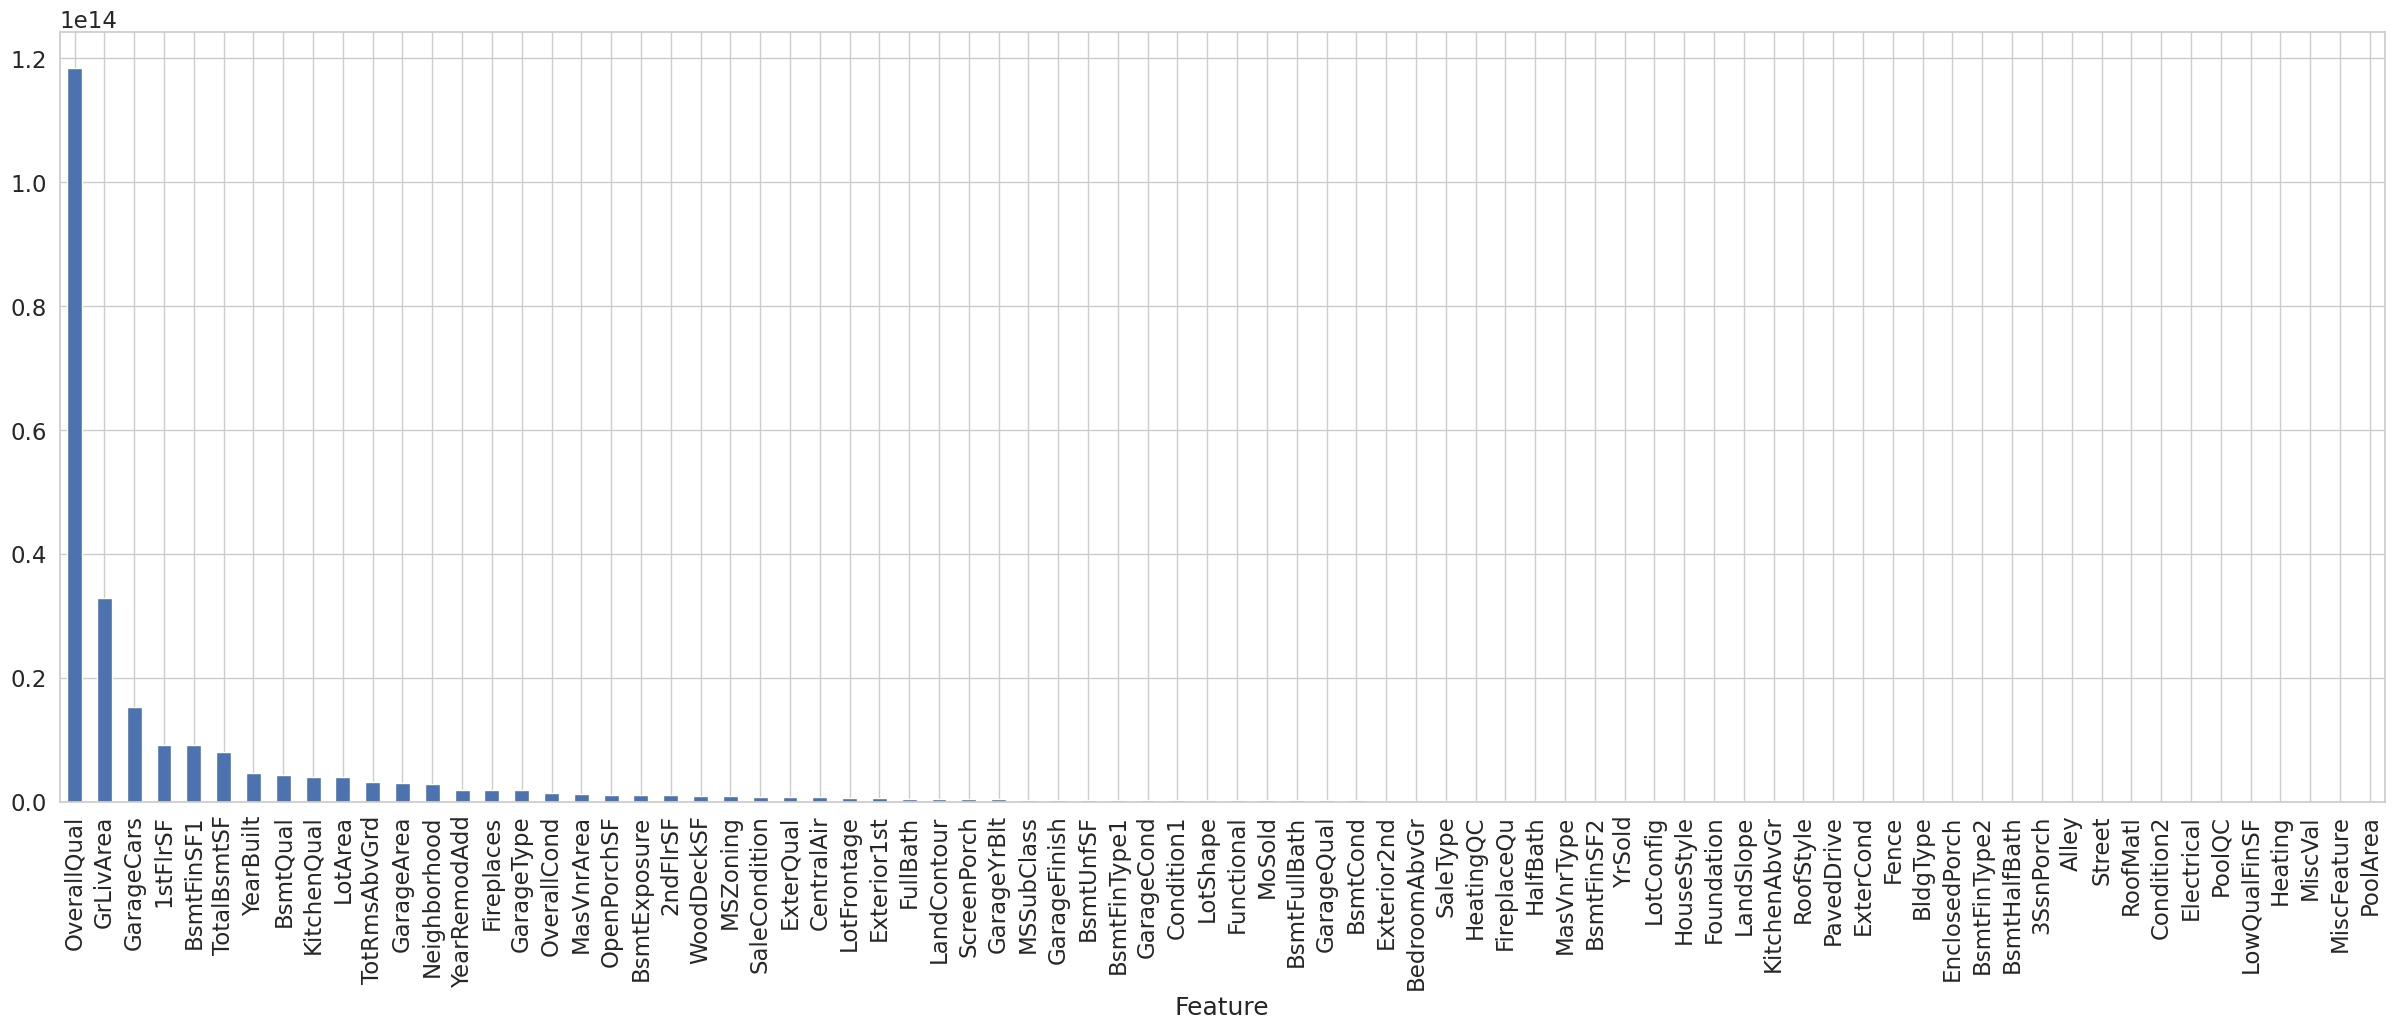

In [96]:
fast_fi = automl_rd.model.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [99]:

# Вывод самых важных признаков
fast_fi_sorted = fast_fi.sort_values(by='Importance', ascending=False)
top_features = fast_fi_sorted.head(32)

# Печать списка самых важных признаков
print("Самые важные признаки:")
print(top_features)

Самые важные признаки:
          Feature    Importance
0     OverallQual  1.184318e+14
1       GrLivArea  3.283422e+13
2      GarageCars  1.525341e+13
3        1stFlrSF  9.155112e+12
4      BsmtFinSF1  9.069882e+12
5     TotalBsmtSF  7.941134e+12
6       YearBuilt  4.559704e+12
7        BsmtQual  4.264056e+12
8     KitchenQual  4.020258e+12
9         LotArea  3.963575e+12
10   TotRmsAbvGrd  3.184404e+12
11     GarageArea  2.974921e+12
12   Neighborhood  2.801062e+12
13   YearRemodAdd  1.883361e+12
14     Fireplaces  1.853905e+12
15     GarageType  1.812491e+12
16    OverallCond  1.323730e+12
17     MasVnrArea  1.174601e+12
18    OpenPorchSF  1.063905e+12
19   BsmtExposure  1.037609e+12
20       2ndFlrSF  1.000087e+12
21     WoodDeckSF  9.665147e+11
22       MSZoning  8.104437e+11
23  SaleCondition  7.862838e+11
24      ExterQual  7.689564e+11
25     CentralAir  7.277493e+11
26    LotFrontage  6.228593e+11
27    Exterior1st  5.724005e+11
28       FullBath  4.230727e+11
29    LandContour

tr_data, te_data

In [108]:
list_top_features = fast_fi_sorted.head(32)['Feature'].tolist()

In [128]:
# Фильтрация данных по самым важным признакам
train_df_filtered = pd.concat([train_df[list_top_features], train_df[target]], axis=1)
test_df_filtered = pd.concat([test_df[list_top_features], test_df[target]], axis=1)


In [138]:
# Определение ролей признаков для фильтрованных данных
roles_filtered = {
    'target': target,
}

# Повторное обучение модели с использованием только самых важных признаков
automl_filtered = TabularUtilizedAutoML(
    task=task,
    timeout=360,
    cpu_limit=4,
    general_params={'use_algos': [['lgb', 'lgb_tuned'], ['cb', 'cb_tuned'], ['xgb', 'xgb_tuned']]},
    selection_params={'mode': 0, 'n_chains': 5, 'n_models': 10}
)

In [139]:
# Обучение модели и предсказание на обучающей выборке
oof_pred_filtered = automl_filtered.fit_predict(train_df_filtered, roles=roles_filtered)

INFO:lightautoml.addons.utilization.utilization:Start automl utilizator with listed constraints:
INFO:lightautoml.addons.utilization.utilization:- time: 360.00 seconds
INFO:lightautoml.addons.utilization.utilization:- CPU: 4 cores
INFO:lightautoml.addons.utilization.utilization:- memory: 16 GB

INFO:lightautoml.addons.utilization.utilization:If one preset completes earlier, next preset configuration will be started

INFO:lightautoml.addons.utilization.utilization:==================================================
INFO:lightautoml.addons.utilization.utilization:Start 0 automl preset configuration:
INFO:lightautoml.addons.utilization.utilization:conf_0_sel_type_0.yml, random state: {'reader_params': {'random_state': 42}, 'nn_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}
INFO3:lightautoml.addons.utilization.utilization:Found general_params in kwargs, need to combine
INFO3:lightautoml.addons.utilization.utilization:Merged variant for general_params = {

In [140]:
# Вычисление MAE на обучающей и тестовой выборке
train_mae_filtered = mean_absolute_error(train_df_filtered[target].values, oof_pred_filtered.data)
test_pred_filtered = automl_filtered.predict(test_df_filtered)
test_mae_filtered = mean_absolute_error(test_df_filtered[target].values, test_pred_filtered.data)

print(f"MAE на обучающей выборке с фильтрованными данными: {train_mae_filtered}")
print(f"Улучшенный MAE на тестовой выборке с фильтрованными данными: {test_mae_filtered}")

MAE на обучающей выборке с фильтрованными данными: 15543.271036226455
Улучшенный MAE на тестовой выборке с фильтрованными данными: 15586.425754494863


In [141]:
# Определение ролей признаков для фильтрованных данных
roles_filtered = {
    'target': target,
}

# Повторное обучение модели с использованием только самых важных признаков
automl_filtered = TabularAutoML(
    task=task,
    timeout=3600,
    cpu_limit=4,
    general_params={'use_algos': [['lgb', 'lgb_tuned'], ['cb', 'cb_tuned'], ['xgb', 'xgb_tuned']]}
)

In [142]:
# Обучение модели и предсказание на обучающей выборке
oof_pred_filtered = automl_filtered.fit_predict(train_df_filtered, roles=roles_filtered)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (1168, 33)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3581.35 secs
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l1: 30096.6
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l1: 20506.7
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l1: 17345.1
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l1: 16420.7
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l1: 16259.2

In [143]:
# Вычисление MAE на обучающей и тестовой выборке
train_mae_filtered = mean_absolute_error(train_df_filtered[target].values, oof_pred_filtered.data)
test_pred_filtered = automl_filtered.predict(test_df_filtered)
test_mae_filtered = mean_absolute_error(test_df_filtered[target].values, test_pred_filtered.data)

print(f"MAE на обучающей выборке с фильтрованными данными: {train_mae_filtered}")
print(f"Улучшенный MAE на тестовой выборке с фильтрованными данными: {test_mae_filtered}")

MAE на обучающей выборке с фильтрованными данными: 15988.551259498074
Улучшенный MAE на тестовой выборке с фильтрованными данными: 15600.518648330479
